In [174]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-pw04zh14/tensorflow-gpu_57c7e3a29f434e599322691b3c5c70f9/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/ten

In [5]:
import tensorflow as tf
import os

In [176]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [177]:
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [178]:
# # Avoid OOM errors by setting Memory Consumption Growth
# for cpu in cpus:
#     tf.config.experimental.set_memory_growth(cpu, True)


# Clean Images

In [12]:
import cv2
import imghdr

/tmp/ipykernel_9213/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [226]:
data_dir = 'archive'

In [227]:
image_extns = ['jpg', 'jpeg', 'png', 'bmp']

In [228]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            extn = imghdr.what(image_path)
            if extn not in image_extns:
                print("Image nnot in extn list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

# Load Data

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [230]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



Keras utility creates dataset and provides a pipeline

In [290]:
data = tf.keras.utils.image_dataset_from_directory('archive', image_size=(256, 256))

Found 40000 files belonging to 2 classes.


The dataset is not loaded into the memory directly, rather it is generated on the go. So converting it into a np iterator, so that we can access and loop through it

In [291]:
data_iterator = data.as_numpy_iterator()

2023-06-30 13:46:41.636937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40000]
	 [[{{node Placeholder/_4}}]]
2023-06-30 13:46:41.637324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40000]
	 [[{{node Placeholder/_4}}]]


Grabbing the actual elements

In [292]:
batch = data_iterator.next()

Batch contains 2 parts - images and labels

In [293]:
len(batch)

2

32 images of size 227x227 and 3 implies RGB

In [294]:
batch[0].shape # Images as np arrays

(32, 256, 256, 3)

In [295]:
batch[1] #Labels of classes

# Class 0 - Negative - Uncracked
# Class 1 - Positive - Cracked

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

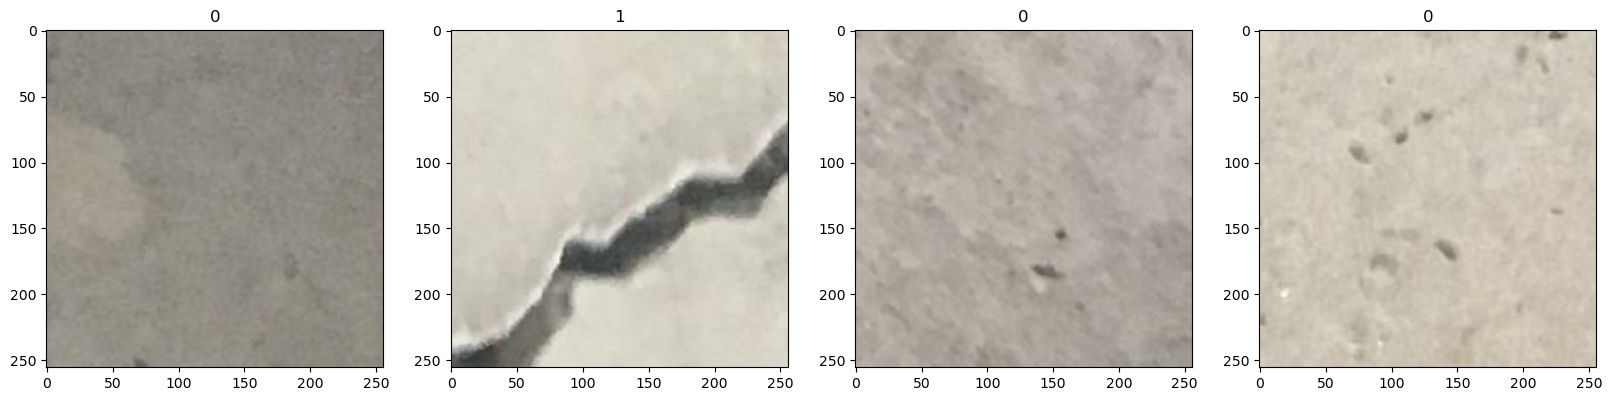

In [296]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess data

## Scaling data

In [297]:
batch[0].min() # 0
batch[0].max() # 255

255.0

Scaling the data as we load it using the pipeline... map function is a part of the data pipeline method

In [298]:
scaled_data = data.map(lambda x,y: (x/255, y)) # MinMaxScaling

In [299]:
scaled_iterator = scaled_data.as_numpy_iterator() # Same as above steps

2023-06-30 13:46:53.024886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40000]
	 [[{{node Placeholder/_4}}]]
2023-06-30 13:46:53.025525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40000]
	 [[{{node Placeholder/_4}}]]


In [300]:
scaled_iterator.next()[0]

array([[[[0.48235294, 0.46666667, 0.41960785],
         [0.48235294, 0.46666667, 0.41960785],
         [0.4851639 , 0.46947762, 0.4224188 ],
         ...,
         [0.6901961 , 0.6627451 , 0.62352943],
         [0.6908624 , 0.66341144, 0.62419575],
         [0.69411767, 0.6666667 , 0.627451  ]],

        [[0.49211857, 0.4764323 , 0.42937347],
         [0.49482062, 0.47913435, 0.43207553],
         [0.5051847 , 0.48949844, 0.4424396 ],
         ...,
         [0.6934513 , 0.6660003 , 0.6267846 ],
         [0.69411767, 0.6666667 , 0.627451  ],
         [0.69737285, 0.6699219 , 0.6307062 ]],

        [[0.52222735, 0.5065411 , 0.45948222],
         [0.5301492 , 0.51446295, 0.4674041 ],
         [0.5450296 , 0.5293433 , 0.4822845 ],
         ...,
         [0.6969286 , 0.66947764, 0.63026196],
         [0.6971173 , 0.66966635, 0.63045067],
         [0.69803923, 0.67058825, 0.6313726 ]],

        ...,

        [[0.7518306 , 0.71653646, 0.68124235],
         [0.7476535 , 0.71235937, 0.67706525]

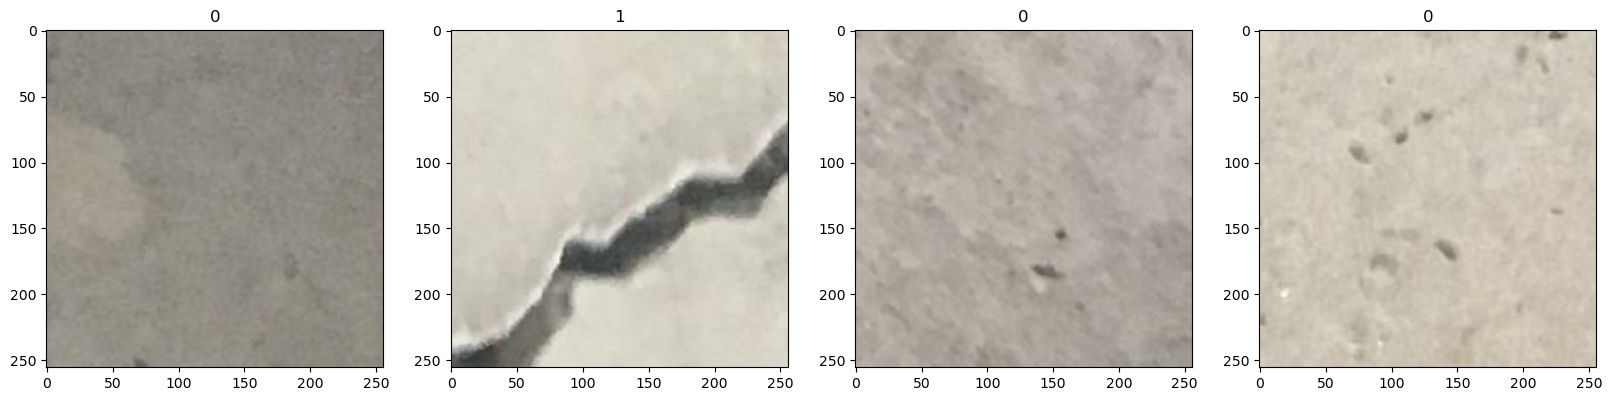

In [301]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Splitting data

In [302]:
len(scaled_data) ## Size of batches

1250

In [303]:
1250*32

40000

In [304]:
train_size = int(len(scaled_data)*0.7)
val_size = int(len(scaled_data)*0.2)
test_size = int(len(scaled_data)*0.1)


In [305]:
train_size + val_size + test_size

1250

In [306]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# Deep Learning Model

In [316]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [317]:
model = Sequential()

In [318]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [319]:
model.compile(optimizer='adam', loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [320]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 30, 30, 16)     

## Training model

In [321]:
logdir = 'logs'

In [322]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [323]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [324]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3


875/875 [==============================] - ETA: 0s - loss: 0.1044 - accuracy: 0.9631

2023-06-30 13:53:49.575321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40000]
	 [[{{node Placeholder/_4}}]]
2023-06-30 13:53:49.576263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40000]
	 [[{{node Placeholder/_4}}]]


875/875 [==============================] - 295s 336ms/step - loss: 0.1044 - accuracy: 0.9631 - val_loss: 0.0511 - val_accuracy: 0.9800
Epoch 2/3
875/875 [==============================] - 296s 339ms/step - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0403 - val_accuracy: 0.9920
Epoch 3/3
875/875 [==============================] - 289s 330ms/step - loss: 0.0512 - accuracy: 0.9851 - val_loss: 0.0520 - val_accuracy: 0.9850


## Plotting Performance

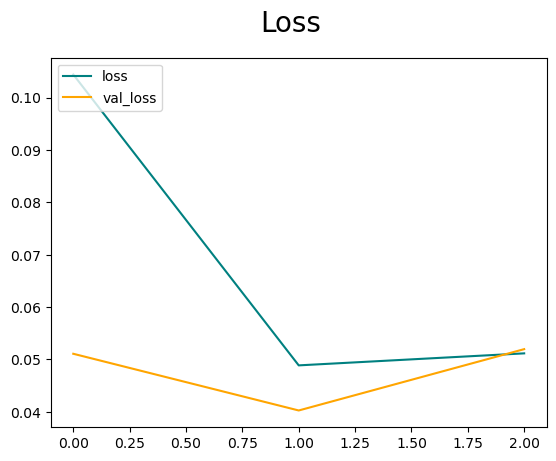

In [325]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

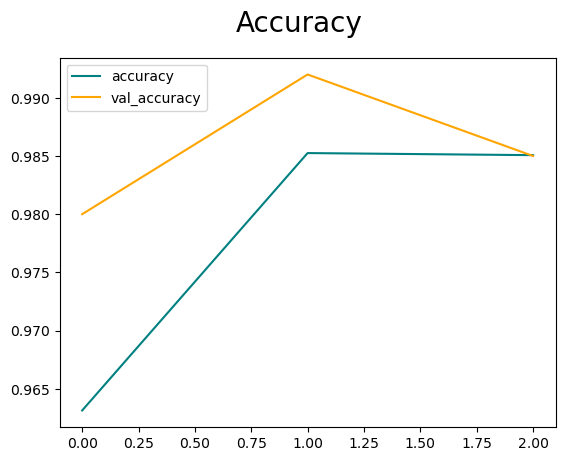

In [326]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [327]:
from tensorflow.keras.metrics import Precision, Recall, BinaryCrossentropy

In [328]:
pre = Precision()
re = Recall()
acc = BinaryCrossentropy()

In [329]:
len(test)

125

In [330]:
for batch_ in test.as_numpy_iterator():
    X, y = batch_
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-06-30 14:04:59.408233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40000]
	 [[{{node Placeholder/_4}}]]
2023-06-30 14:04:59.409251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40000]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 100ms/step


In [331]:
print(f"Accuracy: {acc.result().numpy()}, Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}")

Accuracy: 0.0810069888830185, Precision: 0.9953222274780273, Recall: 0.9623115658760071


# Test

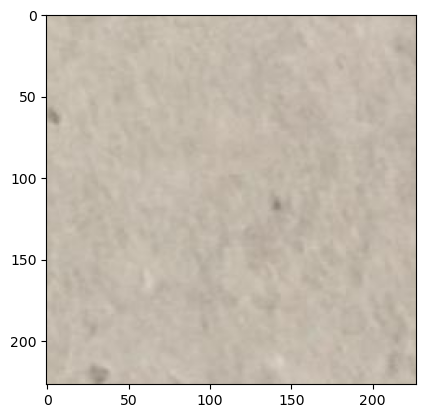

In [13]:
img = cv2.imread('00023.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show() 

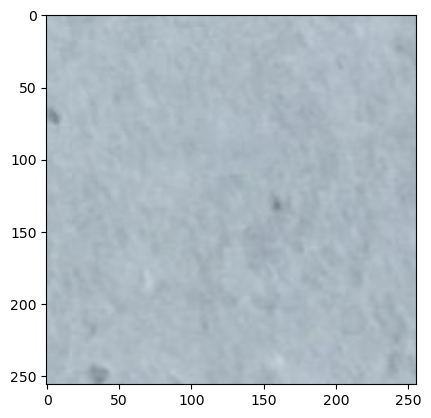

In [14]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

Model expects a batch of image, so using np.expand_dims to enclose the image in another set of array

In [341]:
yhat = model.predict(np.expand_dims(resize/255, 0))
# print(f"The image is a {yhat}")

1/1 [==============================] - 0s 69ms/step


In [342]:
print("The steel is cracked") if yhat > 0.5 else print("The steel is uncracked")

The steel is uncracked


# Saving the model

In [2]:
from tensorflow.keras.models import load_model

2023-06-30 15:53:11.160133: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-30 15:53:11.212585: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 15:53:11.442353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 15:53:11.444337: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 15:53:13.034373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [344]:
model.save(os.path.join('models', 'steelCheckModel.h5'))

In [6]:
new_model = load_model(os.path.join('models', 'steelCheckModel.h5'))

In [15]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 170ms/step


In [16]:
print("The steel is cracked") if yhatnew > 0.5 else print("The steel is uncracked")

The steel is uncracked


The Loaded model is working.